Pequena exploracao dos dados disponibilizados pelo ministerio da saude no site

http://plataforma.saude.gov.br/novocoronavirus/#COVID-19-brazil

## Dados Brasil

In [155]:
import numpy as np
import pandas as pd
import csv
import re

import matplotlib.pyplot as plt

In [183]:
dados_brasil = pd.read_csv('/home/pedrosergiot/Documents/Corona_virus/brasil.csv',
                           delimiter=';',decimal=',', thousands='.')
        
dados_brasil.head()

,Abrangência,Nome,Casos suspeitos,% Casos suspeitos,Casos confirmados,% Casos confirmados,Casos descartados,% Casos descartados,Óbitos,% Óbitos,Total,Transmissão local
0,Unidade da Federação,Rondônia (RO),38.0,92.68,0.0,0.0,3.0,7.32,0.0,0.0,41.0,Não
1,Unidade da Federação,Acre (AC),8.0,100.00,0.0,0.0,0.0,0.00,0.0,0.0,8.0,Não
2,Unidade da Federação,Amazonas (AM),7.0,25.93,1.0,3.7,19.0,70.37,0.0,0.0,27.0,Não
3,Unidade da Federação,Roraima (RR),5.0,100.00,0.0,0.0,0.0,0.00,0.0,0.0,5.0,Não
4,Unidade da Federação,Pará (PA),21.0,48.84,0.0,0.0,22.0,51.16,0.0,0.0,43.0,Não


In [184]:
dados_brasil.iloc[:]['Nome']

0                Rondônia (RO)
1                    Acre (AC)
2                Amazonas (AM)
3                 Roraima (RR)
4                    Pará (PA)
5                   Amapá (AP)
6               Tocantins (TO)
7                        Norte
8                Maranhão (MA)
9                   Piauí (PI)
10                  Ceará (CE)
11    Rio Grande do Norte (RN)
12                Paraíba (PB)
13             Pernambuco (PE)
14                Alagoas (AL)
15                Sergipe (SE)
16                  Bahia (BA)
17                    Nordeste
18           Minas Gerais (MG)
19         Espírito Santo (ES)
20        Rio de Janeiro (RJ)*
21            São Paulo (SP)**
22                     Sudeste
23                 Paraná (PR)
24         Santa Catarina (SC)
25      Rio Grande do Sul (RS)
26                         Sul
27     Mato Grosso do Sul (MS)
28            Mato Grosso (MT)
29                  Goiás (GO)
30       Distrito Federal (DF)
31                Centro-Oeste
32      

In [185]:
dados_brasil = dados_brasil.dropna()

dados_brasil

,Abrangência,Nome,Casos suspeitos,% Casos suspeitos,Casos confirmados,% Casos confirmados,Casos descartados,% Casos descartados,Óbitos,% Óbitos,Total,Transmissão local
0,Unidade da Federação,Rondônia (RO),38.0,92.68,0.0,0.00,3.0,7.32,0.0,0.00,41.0,Não
1,Unidade da Federação,Acre (AC),8.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,8.0,Não
2,Unidade da Federação,Amazonas (AM),7.0,25.93,1.0,3.70,19.0,70.37,0.0,0.00,27.0,Não
3,Unidade da Federação,Roraima (RR),5.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,5.0,Não
4,Unidade da Federação,Pará (PA),21.0,48.84,0.0,0.00,22.0,51.16,0.0,0.00,43.0,Não
5,Unidade da Federação,Amapá (AP),6.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,6.0,Não
6,Unidade da Federação,Tocantins (TO),11.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,11.0,Não
7,Região,Norte,96.0,68.09,1.0,0.71,44.0,31.21,0.0,0.00,141.0,-
8,Unidade da Federação,Maranhão (MA),52.0,86.67,0.0,0.00,8.0,13.33,0.0,0.00,60.0,Não
9,Unidade da Federação,Piauí (PI),14.0,77.78,0.0,0.00,4.0,22.22,0.0,0.00,18.0,Não


In [186]:
dados_regiao = dados_brasil.loc[dados_brasil['Abrangência'] =='Região']

dados_regiao

,Abrangência,Nome,Casos suspeitos,% Casos suspeitos,Casos confirmados,% Casos confirmados,Casos descartados,% Casos descartados,Óbitos,% Óbitos,Total,Transmissão local
7,Região,Norte,96.0,68.09,1.0,0.71,44.0,31.21,0.0,0.00,141.0,-
17,Região,Nordeste,884.0,74.85,30.0,2.54,267.0,22.61,0.0,0.00,1181.0,-
22,Região,Sudeste,6538.0,84.18,205.0,2.64,1023.0,13.17,1.0,0.01,7767.0,-
26,Região,Sul,760.0,66.84,23.0,2.02,354.0,31.13,0.0,0.00,1137.0,-
31,Região,Centro-Oeste,541.0,69.81,32.0,4.13,202.0,26.06,0.0,0.00,775.0,-


In [188]:
dados_pais = dados_brasil.loc[dados_brasil['Abrangência'] == 'País']

dados_pais

,Abrangência,Nome,Casos suspeitos,% Casos suspeitos,Casos confirmados,% Casos confirmados,Casos descartados,% Casos descartados,Óbitos,% Óbitos,Total,Transmissão local
32,País,Brasil,8819.0,80.17,291.0,2.65,1890.0,17.18,1.0,0.01,11001.0,-


In [189]:
dados_estados = dados_brasil.loc[dados_brasil['Abrangência'] == 'Unidade da Federação']

dados_estados

,Abrangência,Nome,Casos suspeitos,% Casos suspeitos,Casos confirmados,% Casos confirmados,Casos descartados,% Casos descartados,Óbitos,% Óbitos,Total,Transmissão local
0,Unidade da Federação,Rondônia (RO),38.0,92.68,0.0,0.00,3.0,7.32,0.0,0.00,41.0,Não
1,Unidade da Federação,Acre (AC),8.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,8.0,Não
2,Unidade da Federação,Amazonas (AM),7.0,25.93,1.0,3.70,19.0,70.37,0.0,0.00,27.0,Não
3,Unidade da Federação,Roraima (RR),5.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,5.0,Não
4,Unidade da Federação,Pará (PA),21.0,48.84,0.0,0.00,22.0,51.16,0.0,0.00,43.0,Não
5,Unidade da Federação,Amapá (AP),6.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,6.0,Não
6,Unidade da Federação,Tocantins (TO),11.0,100.00,0.0,0.00,0.0,0.00,0.0,0.00,11.0,Não
8,Unidade da Federação,Maranhão (MA),52.0,86.67,0.0,0.00,8.0,13.33,0.0,0.00,60.0,Não
9,Unidade da Federação,Piauí (PI),14.0,77.78,0.0,0.00,4.0,22.22,0.0,0.00,18.0,Não
10,Unidade da Federação,Ceará (CE),211.0,67.85,5.0,1.61,95.0,30.55,0.0,0.00,311.0,Não


Text(0.5, 1.0, 'Num Casos confirmados')

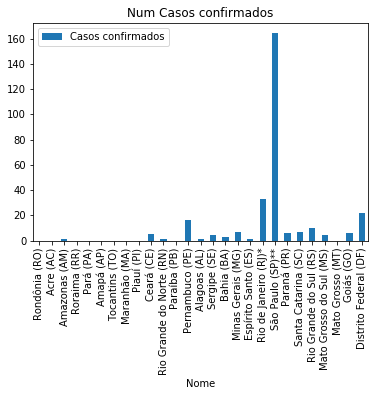

In [195]:
ax = dados_estados.plot(kind='bar', x='Nome', y='Casos confirmados')
ax.set_title('Num Casos confirmados')

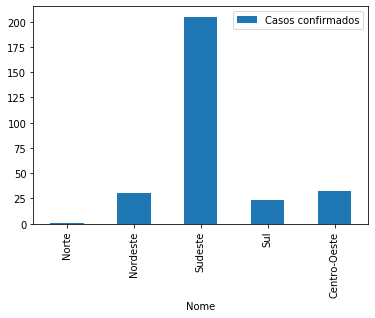

In [196]:
dados_regiao.plot(kind='bar', x='Nome', y='Casos confirmados')

Index(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'], dtype='object', name='Nome')


[Text(0, 0.5, '')]

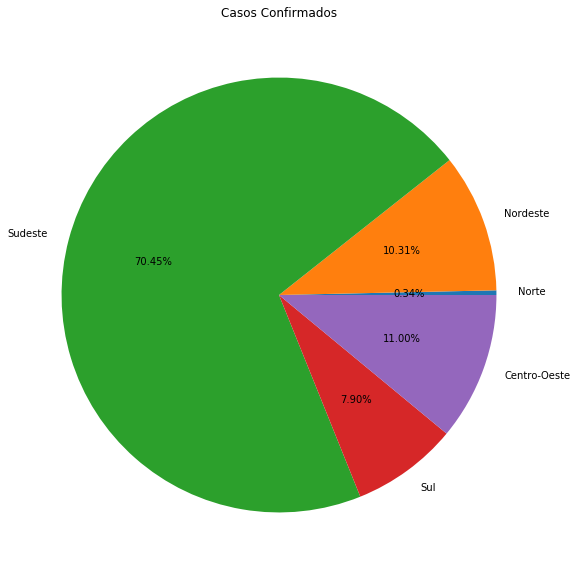

In [197]:
dados_regiao_nome_index = dados_regiao.set_index('Nome')
print(dados_regiao_nome_index.index)
ax = dados_regiao_nome_index.plot.pie(y='Casos confirmados', figsize=(10,10), autopct='%0.2f%%',legend = False, title = 'Casos Confirmados')
ax.set(ylabel='')

# Dados Mundo

In [198]:
historico = pd.read_csv('/home/pedrosergiot/Documents/Corona_virus/historic.csv',delimiter=';',thousands='.')

historico.head()

,Data,Novos Casos China,Novos Casos Mundo (exceto China),Novos Óbitos
0,22/01/2020,31.0,0.0,0.0
1,23/01/2020,262.0,1.0,0.0
2,24/01/2020,259.0,3.0,0.0
3,25/01/2020,467.0,12.0,0.0
4,26/01/2020,688.0,6.0,0.0


In [200]:
historico = historico.dropna()

len(historico)

55

In [209]:
historico.head()

,Data,Novos Casos China,Novos Casos Mundo (exceto China),Novos Óbitos
0,22/01/2020,31.0,0.0,0.0
1,23/01/2020,262.0,1.0,0.0
2,24/01/2020,259.0,3.0,0.0
3,25/01/2020,467.0,12.0,0.0
4,26/01/2020,688.0,6.0,0.0


Text(0.5, 1.0, 'Novos casos por dia')

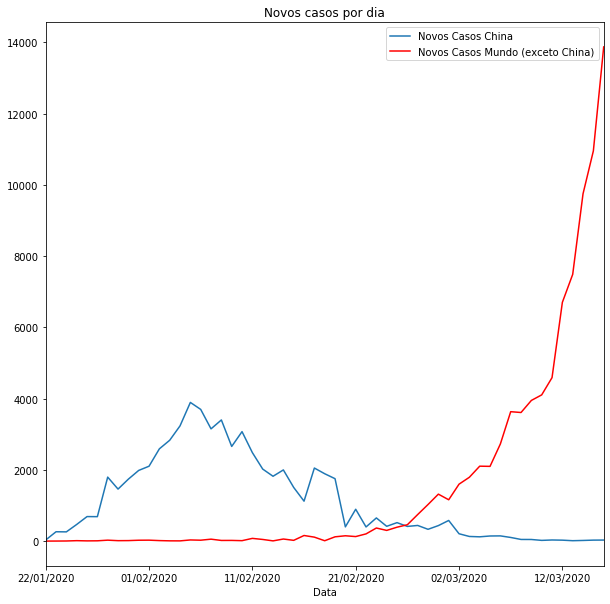

In [207]:
ax = plt.axes()
historico.plot(kind = 'line', y='Novos Casos China', x = 'Data', figsize = (10,10), ax=ax)
historico.plot(kind = 'line', color = 'red', y='Novos Casos Mundo (exceto China)', x='Data', ax=ax)
ax.set_title('Novos casos por dia')

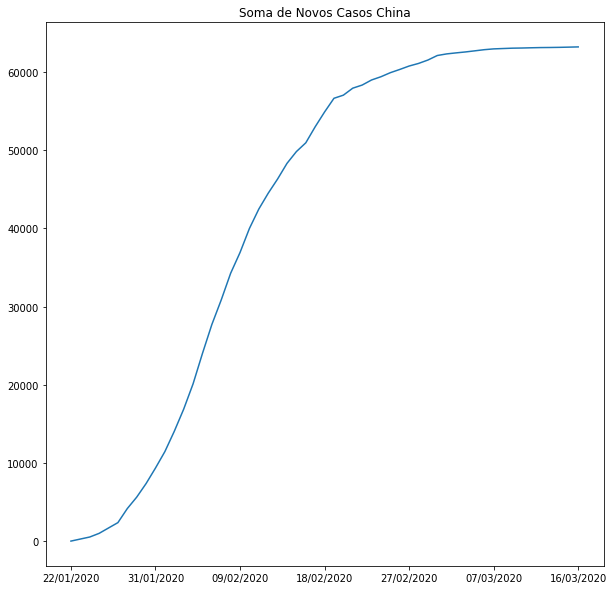

In [238]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(historico['Data'], historico['Novos Casos China'].cumsum(),)
ax.set_title('Soma de Novos Casos China')
plt.xticks(range(0,len(historico),9));

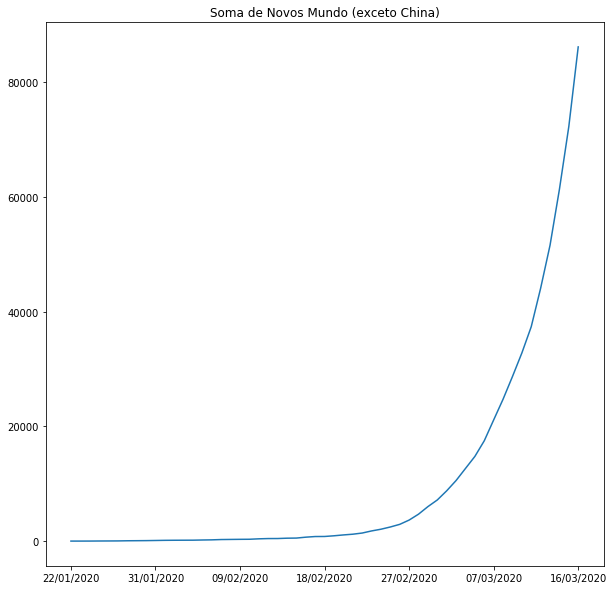

In [239]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(historico['Data'], historico['Novos Casos Mundo (exceto China)'].cumsum(),)
ax.set_title('Soma de Novos Mundo (exceto China)')
plt.xticks(range(0,len(historico),9));